# Predicción de los costos de Casas
## Joaquín Antonio Ramírez Hernández

In [329]:
from scipy import stats
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt

## 1.-Lectura y traducción de datos

### Datos de Training

En esta sección leo y guardo los datos que voy a tener del training para tratar de predecir los costos de las casas en esa unidad. Para esto, todas las variables categóricas que tenía las convierto en enteros para poderlas manejar, decidí no hacerlas dummies por el momento para comparar las soluciones ya presentadas. Además, cambié los valores faltantes por los promedios de su respectiva columna y observo con las dos últimas líneas que no haya ya datos faltantes y que se hayan asignado de manera adecuada los valores asignados.

In [330]:
train1 = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
train1 = train1.drop('Id', axis=1)
train1.rename(columns={'1stFlrSF': 'stFlrSF','2ndFlrSF':'ndFlrSF'}, inplace=True)
train1['MSZoning'] = train1['MSZoning'].replace({'A': 1,'C (all)': 2, 'FV': 3, 'I': 4,'RH': 5,'RL': 6,'RP': 7,'RM': 8})
train1['Street'] = train1['Street'].replace({'Grvl':1,'Pave':2})
train1['Alley'] = train1['Alley'].replace({'Grvl':1,'Pave':2})
train1['Alley'] = train1['Alley'].replace(np.nan,3)
train1['LotShape'] = train1['LotShape'].replace({ 'Reg':1, 'IR1':2, 'IR2':3,'IR3':4})
train1['LandContour'] = train1['LandContour'].replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4})
train1['Utilities'] = train1['Utilities'].replace({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
train1['LotConfig'] = train1['LotConfig'].replace({'Inside':1 , 'Corner':2, 'CulDSac':3, 'FR2': 4,'FR3':5})
train1['LandSlope'] = train1['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3,})
train1['Neighborhood'] = train1['Neighborhood'].replace({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4,'ClearCr':5, 'CollgCr':6, 'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10, 'MeadowV':11,	'Mitchel':12, 'Names':13, 'NAmes':13, 'NoRidge':14, 'NPkVill':15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 'SWISU':19, 'Sawyer':20, 'SawyerW':21, 'Somerst':22,'StoneBr':23, 'Timber':24, 'Veenker':25})
train1['Condition1'] = train1['Condition1'].replace({'Artery':1,'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6,'PosA':7, 'RRNe':8, 'RRAe':9})
train1['BldgType'] = train1['BldgType'].replace({'1Fam':1,'2FmCon':2, '2fmCon':2, 'Duplx':3, 'Duplex':3, 'TwnhsE':4, 'Twnhs':0, 'TwnhsI':5 })
train1['Condition2'] = train1['Condition2'].replace({'Artery':1,'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6, 'PosA' : 7, 'RRNe':8, 'RRAe':9})
train1['HouseStyle'] = train1['HouseStyle'].replace({'1Story':1,'1.5Fin': 2, '1.5Unf': 3, '2Story': 4,'2.5Fin': 5, '2.5Unf':6, 'SFoyer': 7, 'SLvl':8})
train1['RoofStyle'] = train1['RoofStyle'].replace({'Flat':1,'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5, 'Shed':6})
train1['RoofMatl'] = train1['RoofMatl'].replace({'ClyTile':1,'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5, 'Tar&Grv':6,'WdShake':7,'WdShngl':8})
train1['Exterior1st'] = train1['Exterior1st'].replace({'AsbShng':1,'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10, 'Plywood':11, 'PreCast':12,'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16, 'Wd Shng': 17, 'WdShing':17})
train1['Exterior2nd'] = train1['Exterior2nd'].replace({'AsbShng':1,'AsphShn':2, 'BrkComm':3, 'Brk Cmn': 3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6,'CmentBd':6 ,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10, 'Plywood':11, 'PreCast':12,'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16,'Wd Shng':17 , 'WdShing':17})
train1['MasVnrType'] = train1['MasVnrType'].replace({'BrkCmn':1,'BrkFace':2,'CBlock':3, 'None':4,'Stone':5})
train1['ExterQual'] = train1['ExterQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['ExterCond'] = train1['ExterCond'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['Foundation'] = train1['Foundation'].replace({'BrkTil':1, 'PConc':2, 'Slab':3, 'Wood':4, 'CBlock': 5, 'Stone': 6})
train1['BsmtQual'] = train1['BsmtQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['BsmtQual'] = train1['BsmtQual'].replace(np.nan,3)
train1['BsmtCond'] = train1['BsmtCond'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['BsmtCond'] = train1['BsmtCond'].replace(np.nan,6)
train1['BsmtExposure'] = train1['BsmtExposure'].replace({'Gd':1,'Av':2, 'Mn':3, 'No':4})
train1['BsmtExposure'] = train1['BsmtExposure'].replace(np.nan,5)
train1['BsmtFinType1'] = train1['BsmtFinType1'].replace({'GLQ':1,'ALQ':2,'BLQ':3, 'Rec':4,'LwQ':5, 'Unf':6})
train1['BsmtFinType1'] = train1['BsmtFinType1'].replace(np.nan,7)
train1['BsmtFinType2'] = train1['BsmtFinType2'].replace({'GLQ':1,'ALQ':2,'BLQ':3, 'Rec':4,'LwQ':5, 'Unf':6})
train1['BsmtFinType2'] = train1['BsmtFinType2'].replace(np.nan,7)
train1['Heating'] = train1['Heating'].replace({'Floor':1,'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6})
train1['HeatingQC'] = train1['HeatingQC'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['CentralAir'] = train1['CentralAir'].replace({'N':1, 'Y':2})
train1['Electrical'] = train1['Electrical'].replace({'SBrkr':1,'FuseA':2,'FuseF':3, 'FuseP':4,'Mix':5})
train1['KitchenQual'] = train1['KitchenQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['Functional'] = train1['Functional'].replace({'Typ':1,'Min1':2, 'Min2': 3 , 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8})
train1['FireplaceQu'] = train1['FireplaceQu'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['FireplaceQu'] = train1['FireplaceQu'].replace(np.nan,6)
train1['GarageType'] = train1['GarageType'].replace({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn' : 4, 'CarPort': 5, 'Detchd':6})
train1['GarageType'] = train1['GarageType'].replace(np.nan,7)
train1['GarageQual'] = train1['GarageQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['GarageQual'] = train1['GarageQual'].replace(np.nan,6)
train1['GarageFinish'] = train1['GarageFinish'].replace({'Fin':1, 'RFn': 2, 'Unf':3})
train1['GarageFinish'] = train1['GarageFinish'].replace(np.nan,4)
train1['GarageCond'] = train1['GarageCond'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
train1['GarageCond'] = train1['GarageCond'].replace(np.nan,6)
train1['PavedDrive'] = train1['PavedDrive'].replace({'Y':1, 'P':2, 'N':3})
train1['PoolQC'] = train1['PoolQC'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4})
train1['PoolQC'] = train1['PoolQC'].replace(np.nan,5)
train1['Fence'] = train1['Fence'].replace({'GdPrv':1,'MnPrv':2,'GdWo':3, 'MnWw':4})
train1['Fence'] = train1['Fence'].replace(np.nan,5)
train1['MiscFeature'] = train1['MiscFeature'].replace({'Elev':1, 'Gar2':2, 'Othr':3, 'Shed':4,'TenC':5})
train1['MiscFeature'] = train1['MiscFeature'].replace(np.nan,6)
train1['SaleType'] = train1['SaleType'].replace({ 'WD':1, 'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':5,'ConLw':6, 'ConLI':7, 'ConLD':8,'Oth':9})
train1['SaleCondition'] = train1['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6})
train1['MasVnrType']=train1['MasVnrType'].replace(np.nan,train1['MasVnrType'].mean())
train1['MasVnrArea']=train1['MasVnrArea'].replace(np.nan,train1['MasVnrArea'].mean())
train1['Electrical']=train1['Electrical'].replace(np.nan,train1['Electrical'].mean())
train1['LotFrontage']=train1['LotFrontage'].replace(np.nan,train1['LotFrontage'].mean())
train1['GarageYrBlt']=train1['GarageYrBlt'].replace(np.nan,train1['GarageYrBlt'].mean())
train1 = train1.drop([1459],axis=0)
train1.info()
train1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null float64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null object
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null object
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null objec

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,6,65.0,8450,2,3.0,1,1,1,1,...,0,5.0,5.0,6.0,0,2,2008,1,1,208500
1,20,6,80.0,9600,2,3.0,1,1,1,4,...,0,5.0,5.0,6.0,0,5,2007,1,1,181500
2,60,6,68.0,11250,2,3.0,2,1,1,1,...,0,5.0,5.0,6.0,0,9,2008,1,1,223500
3,70,6,60.0,9550,2,3.0,2,1,1,2,...,0,5.0,5.0,6.0,0,2,2006,1,2,140000
4,60,6,84.0,14260,2,3.0,2,1,1,4,...,0,5.0,5.0,6.0,0,12,2008,1,1,250000


Con el siguiente codigo, calculo la matriz de correlaciones, después, creo un nuevo DataFrame en donde cada columna va a contener las correlaciones que hay entre si. Como solo quiero considerar las correlaciones en los precios de venta, solo me fijo en la columna SalePrice, después la ordeno y finalmente me fijo en los datos o columnas que tengan una correlación mayor a 0.50

In [331]:
x = train1.values 
correlation_mat = train1.corr()
correlation_mat
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs['SalePrice'].sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) >  0.50]
print(strong_pairs)

BsmtQual       -0.650092
GarageFinish   -0.550086
FireplaceQu    -0.520360
YearRemodAdd    0.507015
YearBuilt       0.522877
TotRmsAbvGrd    0.533682
FullBath        0.560604
stFlrSF         0.605971
TotalBsmtSF     0.613792
GarageArea      0.623385
GarageCars      0.640383
GrLivArea       0.708584
OverallQual     0.790972
SalePrice       1.000000
dtype: float64


Con esto me percato que BsmtQual, GarageFinish, FireplaceQu, YearRemodAdd, YearBuilt, TotRmsAbvGrd, FullBath, stFlrSF, TotalBsmtSF, GarageArea, GarageCars, GrLivArea, OverallQual son los datos que tienen mayor correlación con el precio de venta.

In [334]:
train2 = pd.DataFrame({'BsmtQual' : train1['BsmtQual'],'GarageArea':train1['GarageArea'],'stFlrSF':train1['stFlrSF'],'FullBath':train1['FullBath'],'TotRmsAbvGrd':train1['TotRmsAbvGrd'],'YearBuilt':train1['YearBuilt'],'YearRemodAdd':train1['YearRemodAdd'], 'GarageFinish': train1['GarageFinish'],'FireplaceQu': train1['FireplaceQu'], 'GarageCars' : train1['GarageCars'],'GrLivArea' : train1['GrLivArea'],'OverallQual' : train1['OverallQual'],'TotalBsmtSF':train1['TotalBsmtSF']})

## Ajuste lineal

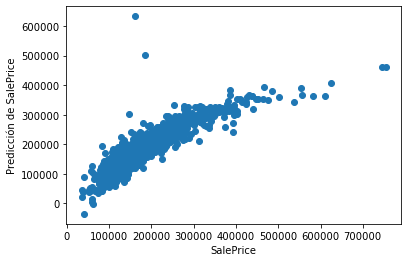

array([207716.64797494, 180385.54369043, 221977.53365539, ...,
       235247.08359384, 224074.98647249, 119198.01530728])

In [335]:
lineal = LinearRegression(normalize=False)
lineal = lineal.fit(train2,train1['SalePrice'])
fig,ax = plt.subplots()
ax.scatter(train1['SalePrice'], lineal.predict(train2))
plt.xlabel('SalePrice')
plt.ylabel('Predicción de SalePrice')
plt.show()
plt.xticks
lineal.predict(train2)

## Ajuste Lasso

In [336]:
lasso_model = Lasso(alpha=2.5,normalize=True, max_iter=1e6)
lasso_model.fit(train2,train1['SalePrice'])
lasso_model.coef_

array([-1.69301918e+04,  2.48969501e+01,  1.25378412e+01, -5.71346030e+03,
        6.18297081e+02,  6.97420184e+01,  2.54667284e+02, -2.12820078e+03,
       -3.05541666e+03,  6.44563268e+03,  4.51409205e+01,  1.59488024e+04,
        1.78121572e+01])

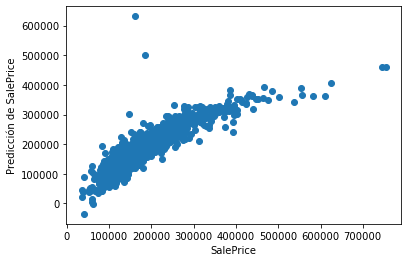

array([207647.08467203, 180776.922234  , 222049.51602697, ...,
       235223.26774135, 224055.4651118 , 119165.40288001])

In [337]:
fig,ax = plt.subplots()
ax.scatter(train1['SalePrice'], lasso_model.predict(train2))
plt.xlabel('SalePrice')
plt.ylabel('Predicción de SalePrice')
plt.show()
plt.xticks
lasso_model.predict(train2)

## Ajuste Rigid

In [338]:
ridge_model = Ridge(alpha=3)
ridge_model.fit(train2,train1['SalePrice'])
ridge_model.coef_

array([-1.68004362e+04,  2.51311080e+01,  1.25817220e+01, -6.33640251e+03,
        6.98155122e+02,  7.68269302e+01,  2.59746195e+02, -2.15084643e+03,
       -3.07896597e+03,  6.38403533e+03,  4.54279120e+01,  1.59080540e+04,
        1.78504305e+01])

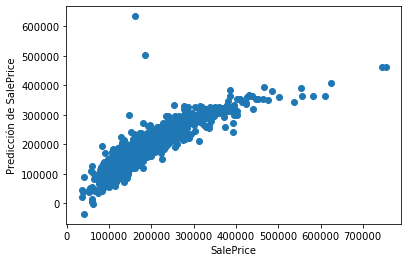

array([207719.77975021, 180357.05088624, 222055.01291816, ...,
       235224.1457714 , 224206.93189584, 119225.35656087])

In [364]:
fig,ax = plt.subplots()
ax.scatter(train1['SalePrice'], ridge_model.predict(train2))
plt.xlabel('SalePrice')
plt.ylabel('Predicción de SalePrice')
plt.show()
plt.xticks
ridge_model.predict(train2)

### Datos de Testing

En esta sección, nuevamente se vuelve a limpiar la base de datos de testing

In [358]:
test1 = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")
test1 = test1.drop('Id', axis=1)
test1.rename(columns={'1stFlrSF': 'stFlrSF','2ndFlrSF':'ndFlrSF'}, inplace=True)
test1['MSZoning'] = test1['MSZoning'].replace({'A': 1,'C (all)': 2, 'FV': 3, 'I': 4,'RH': 5,'RL': 6,'RP': 7,'RM': 8})
test1['Street'] = test1['Street'].replace({'Grvl':1,'Pave':2})
test1['Alley'] = test1['Alley'].replace({'Grvl':1,'Pave':2})
test1['Alley'] = test1['Alley'].replace(np.nan,3)
test1['LotShape'] = test1['LotShape'].replace({ 'Reg':1, 'IR1':2, 'IR2':3,'IR3':4})
test1['LandContour'] = test1['LandContour'].replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4})
test1['Utilities'] = test1['Utilities'].replace({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
test1['LotConfig'] = test1['LotConfig'].replace({'Inside':1 , 'Corner':2, 'CulDSac':3, 'FR2': 4,'FR3':5})
test1['LandSlope'] = test1['LandSlope'].replace({'Gtl':1, 'Mod':2, 'Sev':3,})
test1['Neighborhood'] = test1['Neighborhood'].replace({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4,'ClearCr':5, 'CollgCr':6, 'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10, 'MeadowV':11,	'Mitchel':12, 'Names':13, 'NAmes':13, 'NoRidge':14, 'NPkVill':15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 'SWISU':19, 'Sawyer':20, 'SawyerW':21, 'Somerst':22,'StoneBr':23, 'Timber':24, 'Veenker':25})
test1['Condition1'] = test1['Condition1'].replace({'Artery':1,'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6,'PosA':7, 'RRNe':8, 'RRAe':9})
test1['BldgType'] = test1['BldgType'].replace({'1Fam':1,'2FmCon':2, '2fmCon':2, 'Duplx':3, 'Duplex':3, 'TwnhsE':4, 'Twnhs':0, 'TwnhsI':5 })
test1['Condition2'] = test1['Condition2'].replace({'Artery':1,'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5, 'PosN':6, 'PosA' : 7, 'RRNe':8, 'RRAe':9})
test1['HouseStyle'] = test1['HouseStyle'].replace({'1Story':1,'1.5Fin': 2, '1.5Unf': 3, '2Story': 4,'2.5Fin': 5, '2.5Unf':6, 'SFoyer': 7, 'SLvl':8})
test1['RoofStyle'] = test1['RoofStyle'].replace({'Flat':1,'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5, 'Shed':6})
test1['RoofMatl'] = test1['RoofMatl'].replace({'ClyTile':1,'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5, 'Tar&Grv':6,'WdShake':7,'WdShngl':8})
test1['Exterior1st'] = test1['Exterior1st'].replace({'AsbShng':1,'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10, 'Plywood':11, 'PreCast':12,'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16, 'Wd Shng': 17, 'WdShing':17})
test1['Exterior2nd'] = test1['Exterior2nd'].replace({'AsbShng':1,'AsphShn':2, 'BrkComm':3, 'Brk Cmn': 3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6,'CmentBd':6 ,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10, 'Plywood':11, 'PreCast':12,'Stone':13, 'Stucco':14, 'VinylSd':15, 'Wd Sdng':16,'Wd Shng':17 , 'WdShing':17})
test1['MasVnrType'] = test1['MasVnrType'].replace({'BrkCmn':1,'BrkFace':2,'CBlock':3, 'None':4,'Stone':5})
test1['ExterQual'] = test1['ExterQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['ExterCond'] = test1['ExterCond'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['Foundation'] = test1['Foundation'].replace({'BrkTil':1, 'PConc':2, 'Slab':3, 'Wood':4, 'CBlock': 5, 'Stone': 6})
test1['BsmtQual'] = test1['BsmtQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['BsmtQual'] = test1['BsmtQual'].replace(np.nan,3)
test1['BsmtCond'] = test1['BsmtCond'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['BsmtCond'] = test1['BsmtCond'].replace(np.nan,6)
test1['BsmtExposure'] = test1['BsmtExposure'].replace({'Gd':1,'Av':2, 'Mn':3, 'No':4})
test1['BsmtExposure'] = test1['BsmtExposure'].replace(np.nan,5)
test1['BsmtFinType1'] = test1['BsmtFinType1'].replace({'GLQ':1,'ALQ':2,'BLQ':3, 'Rec':4,'LwQ':5, 'Unf':6})
test1['BsmtFinType1'] = test1['BsmtFinType1'].replace(np.nan,7)
test1['BsmtFinType2'] = test1['BsmtFinType2'].replace({'GLQ':1,'ALQ':2,'BLQ':3, 'Rec':4,'LwQ':5, 'Unf':6})
test1['BsmtFinType2'] = test1['BsmtFinType2'].replace(np.nan,7)
test1['Heating'] = test1['Heating'].replace({'Floor':1,'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6})
test1['HeatingQC'] = test1['HeatingQC'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['CentralAir'] = test1['CentralAir'].replace({'N':1, 'Y':2})
test1['Electrical'] = test1['Electrical'].replace({'SBrkr':1,'FuseA':2,'FuseF':3, 'FuseP':4,'Mix':5})
test1['KitchenQual'] = test1['KitchenQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['Functional'] = test1['Functional'].replace({'Typ':1,'Min1':2, 'Min2': 3 , 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8})
test1['FireplaceQu'] = test1['FireplaceQu'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['FireplaceQu'] = test1['FireplaceQu'].replace(np.nan,6)
test1['GarageType'] = test1['GarageType'].replace({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn' : 4, 'CarPort': 5, 'Detchd':6})
test1['GarageType'] = test1['GarageType'].replace(np.nan,7)
test1['GarageQual'] = test1['GarageQual'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['GarageQual'] = test1['GarageQual'].replace(np.nan,6)
test1['GarageFinish'] = test1['GarageFinish'].replace({'Fin':1, 'RFn': 2, 'Unf':3})
test1['GarageFinish'] = test1['GarageFinish'].replace(np.nan,4)
test1['GarageCond'] = test1['GarageCond'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4, 'Po':5})
test1['GarageCond'] = test1['GarageCond'].replace(np.nan,6)
test1['PavedDrive'] = test1['PavedDrive'].replace({'Y':1, 'P':2, 'N':3})
test1['PoolQC'] = test1['PoolQC'].replace({'Ex':1,'Gd':2,'TA':3, 'Fa': 4})
test1['PoolQC'] = test1['PoolQC'].replace(np.nan,5)
test1['Fence'] = test1['Fence'].replace({'GdPrv':1,'MnPrv':2,'GdWo':3, 'MnWw':4})
test1['Fence'] = test1['Fence'].replace(np.nan,5)
test1['MiscFeature'] = test1['MiscFeature'].replace({'Elev':1, 'Gar2':2, 'Othr':3, 'Shed':4,'TenC':5})
test1['MiscFeature'] = test1['MiscFeature'].replace(np.nan,6)
test1['SaleType'] = test1['SaleType'].replace({ 'WD':1, 'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':5,'ConLw':6, 'ConLI':7, 'ConLD':8,'Oth':9})
test1['SaleCondition'] = test1['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6})
test1['MasVnrType'] = test1['MasVnrType'].replace(np.nan,test1['MasVnrType'].mean())
test1['MasVnrArea'] = test1['MasVnrArea'].replace(np.nan,test1['MasVnrArea'].mean())
test1['Electrical'] = test1['Electrical'].replace(np.nan,test1['Electrical'].mean())
test1['LotFrontage'] = test1['LotFrontage'].replace(np.nan,test1['LotFrontage'].mean())
test1['GarageYrBlt'] = test1['GarageYrBlt'].replace(np.nan,test1['GarageYrBlt'].mean())
test1['MSZoning'] = test1['MSZoning'].replace(np.nan,test1['MSZoning'].mean())
test1['Utilities'] = test1['Utilities'].replace(np.nan,test1['Utilities'].mean())
test1['Exterior1st'] = test1['Exterior1st'].replace(np.nan,test1['Exterior1st'].mean())
test1['Exterior2nd'] = test1['Exterior2nd'].replace(np.nan,test1['Exterior2nd'].mean())
test1['BsmtFinSF1'] = test1['BsmtFinSF1'].replace(np.nan,test1['BsmtFinSF1'].mean())
test1['BsmtFinSF2'] = test1['BsmtFinSF2'].replace(np.nan,test1['BsmtFinSF2'].mean())
test1['BsmtUnfSF'] = test1['BsmtUnfSF'].replace(np.nan,test1['BsmtUnfSF'].mean())
test1['TotalBsmtSF'] = test1['TotalBsmtSF'].replace(np.nan,test1['TotalBsmtSF'].mean())
test1['BsmtFullBath'] = test1['BsmtFullBath'].replace(np.nan,test1['BsmtFullBath'].mean())
test1['BsmtHalfBath'] = test1['BsmtHalfBath'].replace(np.nan,test1['BsmtHalfBath'].mean())
test1['KitchenQual'] = test1['KitchenQual'].replace(np.nan,test1['KitchenQual'].mean())
test1['Functional'] = test1['Functional'].replace(np.nan,test1['Functional'].mean())
test1['GarageCars'] = test1['GarageCars'].replace(np.nan,test1['GarageCars'].mean())
test1['GarageArea'] = test1['GarageArea'].replace(np.nan,test1['GarageArea'].mean())
test1['SaleType'] = test1['SaleType'].replace(np.nan,test1['SaleType'].mean())
test1.info()
test1.head()

Aquí defino un nuevo DataFrame donde van a estar los datos mayor correlacionados del testing

In [359]:
test2 = pd.DataFrame({'BsmtQual' : test1['BsmtQual'],'GarageArea':test1['GarageArea'],'stFlrSF':test1['stFlrSF'],'FullBath':test1['FullBath'],'TotRmsAbvGrd':test1['TotRmsAbvGrd'],'YearBuilt':test1['YearBuilt'],'YearRemodAdd':test1['YearRemodAdd'], 'GarageFinish': test1['GarageFinish'],'FireplaceQu': test1['FireplaceQu'], 'GarageCars' : test1['GarageCars'],'GrLivArea' : test1['GrLivArea'],'OverallQual' : test1['OverallQual'],'TotalBsmtSF':test1['TotalBsmtSF']})

Aquí doy las predicciones de los precios de la casa según el ajuste lineal

In [362]:
lineal.predict(test2)

array([109074.6210369 , 147426.31478392, 180908.77750887, ...,
       156464.4017389 , 115192.89503018, 243143.43213598])

Aquí doy las predicciones de los precios de la casa según el ajuste lasso

In [363]:
lasso_model.predict(test2)

array([109229.99822121, 147353.88279574, 181001.13445919, ...,
       156098.34926292, 114889.16158118, 242895.39507079])

Aquí doy las predicciones de los precios de la casa según el ajuste ridge

In [365]:
ridge_model.predict(test2)

array([109237.14111788, 147426.14162919, 180988.21433745, ...,
       156530.49103508, 115117.13456211, 243081.69832281])